# Keras Callbacks and Functional API

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train_t, y_train), (X_test_t, y_test) = cifar10.load_data()

X_train_t = X_train_t.astype('float32') / 255.
X_test_t = X_test_t.astype('float32') / 255.

X_train = X_train_t.reshape(len(X_train_t), 32*32*3)
X_test = X_test_t.reshape(len(X_test_t), 32*32*3)

In [3]:
print("Training set:")
print("Tensor images shape:\t", X_train_t.shape)
print("Flat images shape:\t", X_train.shape)
print("Labels shape:\t\t", y_train.shape)

Training set:
Tensor images shape:	 (50000, 32, 32, 3)
Flat images shape:	 (50000, 3072)
Labels shape:		 (50000, 1)


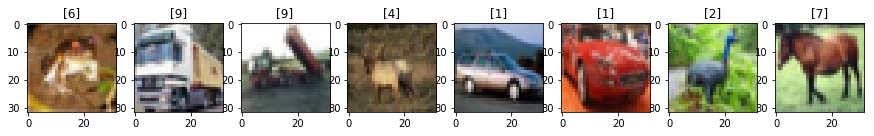

In [4]:
plt.figure(figsize=(15, 4))
for i in range(0, 8):
    plt.subplot(1, 8, i+1)
    plt.imshow(X_train[i].reshape(32, 32, 3))
    plt.title(y_train[i])

## Callbacks on a simple model

In [5]:
outpath='/tmp/tensorflow_logs/cifar/'

early_stopper = EarlyStopping(monitor='val_acc', patience=10)
tensorboard = TensorBoard(outpath, histogram_freq=1)
checkpointer = ModelCheckpoint(outpath+'weights_epoch_{epoch:02d}_val_acc_{val_acc:.2f}.hdf5',
                               monitor='val_acc')

In [6]:
model = Sequential()
model.add(Dense(1024, activation='relu',
                input_dim=3072))

model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_split=0.1,
          callbacks=[early_stopper,
                     tensorboard,
                     checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 35s 787us/step - loss: 5.7720 - acc: 0.2020 - val_loss: 2.1303 - val_acc: 0.2520
Epoch 2/5
45000/45000 [==============================] - 38s 845us/step - loss: 1.8326 - acc: 0.3396 - val_loss: 1.8409 - val_acc: 0.3188
Epoch 3/5
45000/45000 [==============================] - 37s 827us/step - loss: 1.7203 - acc: 0.3838 - val_loss: 1.7661 - val_acc: 0.3662
Epoch 4/5
45000/45000 [==============================] - 35s 780us/step - loss: 1.6515 - acc: 0.4108 - val_loss: 1.6635 - val_acc: 0.4108
Epoch 5/5
45000/45000 [==============================] - 36s 796us/step - loss: 1.5967 - acc: 0.4304 - val_loss: 1.6162 - val_acc: 0.4172


In [9]:
import os
sorted(os.listdir(outpath))

['events.out.tfevents.1536858561.Starjis.local',
 'events.out.tfevents.1536859049.Starjis.local',
 'weights_epoch_01_val_acc_0.10.hdf5',
 'weights_epoch_01_val_acc_0.25.hdf5',
 'weights_epoch_02_val_acc_0.10.hdf5',
 'weights_epoch_02_val_acc_0.32.hdf5',
 'weights_epoch_03_val_acc_0.37.hdf5',
 'weights_epoch_04_val_acc_0.41.hdf5',
 'weights_epoch_05_val_acc_0.42.hdf5']

Now check the tensorboard.

- If using provided instance, just browse to: `http://<your-ip>:6006`

- If using local, open a terminal, activate the environment and run:
```
tensorboard --logdir=/tmp/tensorflow_logs/cifar/
```
then open a browser at `localhost:6006`

You should see something like this:

![tensorboard.png](../assets/tensorboard.png)

## Exercise 1: Keras functional API

We'e built a model using the `Sequential API` from Keras. Keras also offers a [functional API](https://keras.io/getting-started/functional-api-guide/). This API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

Can you rewrite the model above using the functional API?

In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
inputs = Input(shape=(3072,))
x = Dense(1024, activation='relu')(inputs)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.1)

# Final test evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Exercise 2: Convolutional Model with Functional API

The above model is a very simple fully connected deep neural network. As we have seen, Convolutional Neural Networks are much more powerful when dealing with images. The original data has shape:

    (N_images, Height, Width, Channels)
    
Can you write a convolutional model using the functional API?

In [ ]:
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten

In [ ]:
inputs = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3),
           padding='same',
           activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


# Fit your model
model.fit(X_train_t, y_train,
          batch_size=32,
          epochs=2,
          validation_data=(X_test_t, y_test),
          shuffle=True,
          verbose=1)

## Exrcise 3: Discuss with the person next to you 

1. What are the pros/cons of the sequential API?
- What are the pros/cons of the functional API?
- What are the key differences between a Fully connected and a Convolutional neural network?
- What is a dropout layer? How does it work? Why does it help?
